## **Practical Lab 4**
### *Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.*

**Problem Definition**

The problem we aim to solve is to create a model that accurately predicts the risk of diabetes progression using a body mass index (BMI). This model will serve as a screening tool for doctors to identify patients at a higher risk of developing diabetes.

**Data Collection**

The data used in this Machine Learning model are from the [sklearn's diabetes dataset.](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [1]:
# importing required libraries.
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.pipeline import Pipeline



Loading data from the sklearn.

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True,as_frame=True)

Reading the data

In [3]:
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664


Merging X and Y in single dataframe for analysis.

In [4]:
diabetes_full = pd.concat([diabetes_X, diabetes_Y], axis="columns")

### **EDA**

**General Statistics**

In [5]:
diabetes_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


This dataset consists of 11 columns and all values are in numerical format. All features has 442 entries which means there is no data discrepancy among other features.

In [6]:
diabetes_full.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,152.13348
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318,87.00000
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792,211.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000


Based on the analysis, it can seen that the dataset contains 442 samples. The mean values for most columns are close to zero, which means that the data might be normalized. The standard deviation is low for all columns except the 'target' column, which indicates greater variability in the target variable. 

**Making sure there is no null value**

In [7]:
diabetes_full.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

As the sum of null value is zero for all the columns, this dataset does not contain any null value.

### **Finding Corelation**

Text(0.5, 1.0, 'Correlation matrix')

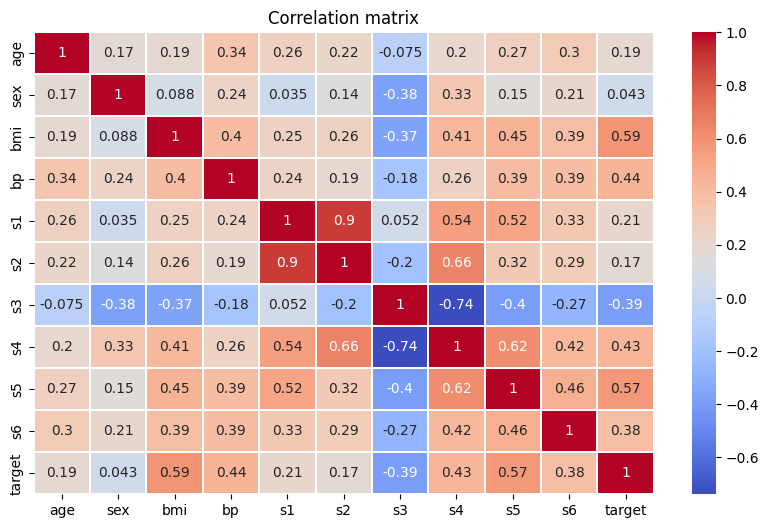

In [8]:
fig, axes = plt.subplots(1,1, figsize=(10,6))

heatmap = sns.heatmap(diabetes_full.corr(), annot=True,cmap='coolwarm', linewidths=0.3)
heatmap.set_title("Correlation matrix")


**Key corelation of features with target:**

|Feature|Corelation Type|
|-------|---------------|
|BMI|Positive|
|BP|Positive|
|s3|Negative|
|s4|Positive|
|s5|Positive|


**Other corelations**
1. 's2' has high positive corelatation with 's1' and 's4'.
2. 's3' and 's4' are highly corelatation with negative value.

**Exploring patterns between BMI and target using histogram**

Text(0.5, 0, 'Target')

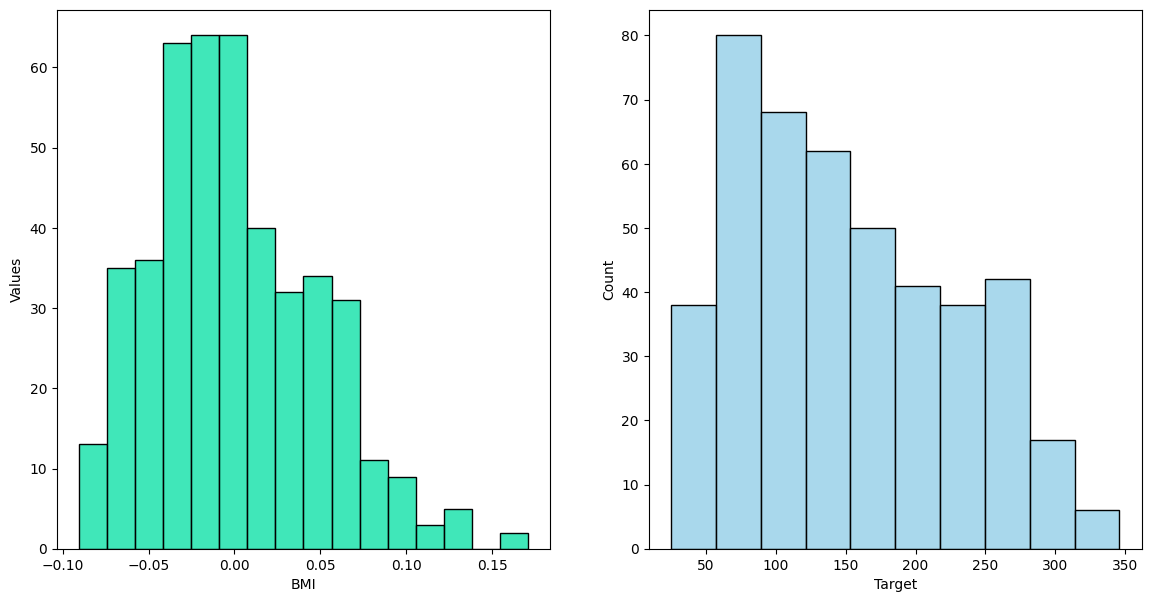

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), gridspec_kw={"width_ratios":[7, 7]})

sns.histplot(data=diabetes_full[["bmi"]],x="bmi",ax=axes[0], color="#00DFA2")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Values")

sns.histplot(data=diabetes_full[["target"]],x="target",ax=axes[1], color="#8DCBE6")
axes[1].set_xlabel("Target")

### **Checking for outliers**

Text(0.5, 0, 'Target')

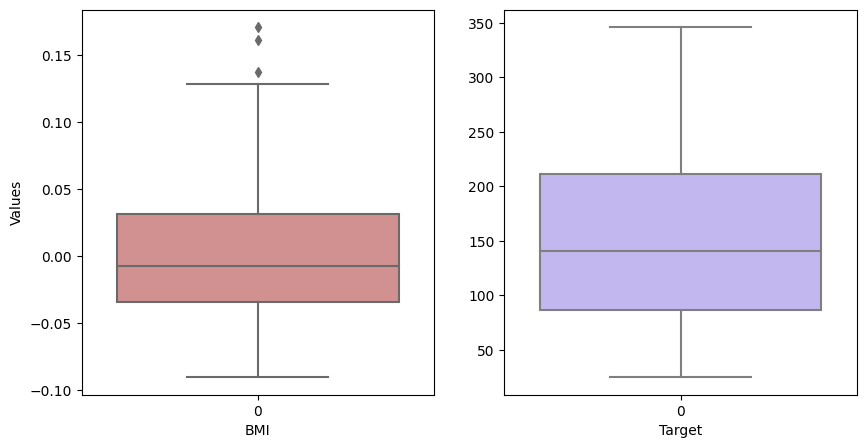

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), gridspec_kw={"width_ratios":[5, 5]})

sns.boxplot(data=diabetes_X['bmi'] ,ax=axes[0], color="#DC8686")
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Values")

sns.boxplot(data=diabetes_Y ,ax=axes[1],color="#BEADFA")
axes[1].set_xlabel("Target")

As boxplot shows presence of minor outliers, hence these outliers need to remove from the dataset. Otherwise, they will affect the accuracy of our model.

### **Cleaning the data**

Removing outliers found in previous step filtering precise data to train the model.

In [11]:

# Calculating IQR
quntile1 = diabetes_full['bmi'].quantile(0.25)
quntile3 = diabetes_full['bmi'].quantile(0.75)
IQR = quntile3 - quntile1

lower_limit = quntile1 - 1.5 * IQR
upper_limit = quntile1 + 1.5 * IQR

df_final = diabetes_full[(diabetes_full['bmi'] >= lower_limit) & (diabetes_full['bmi'] <= upper_limit)]
df_final.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.00000
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.00000
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.00000
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.00000
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.00000


As we can see that records is reduced from 442 to 398 means 44 outliers is removed from the dataframe. Now data is ready for further steps.

### **Splitting the data**

Now data needs to be split into training(70%), validation(15%) and test(15%) dataset.

In [12]:
df_train, df_test  = train_test_split(df_final,test_size=0.3,random_state=32)
df_validation, df_test = train_test_split(df_test,test_size=0.5,random_state=32)

#Traing data
X_train = np.array(df_train[['bmi']])
y_train = np.array(df_train[['target']])

#Validation data
X_validation = np.array(df_validation[['bmi']])
y_validation = np.array(df_validation[['target']])

#Test data
X_test = np.array(df_test[['bmi']])
y_test = np.array(df_test[['target']])

Hence, three dataframes are created for training, validation and testing purpose.

### **Plynomial Regression**

In this section, polynomial regression model is trained for "bmi" vs "target(disease progression one year after baseline)" with degree of 0 to 5.

In [13]:
models =[]
    
def fit_model(degree):
    return Pipeline([('polynomial', PolynomialFeatures(degree=degree)), 
                  ('linear', LinearRegression())])

print(f'First five of X_train:\n{X_train[:5]}')
for degree in range(0,6):
    model = fit_model(degree=degree)
    model.fit(X_train.reshape(-1, 1), y_train)
    models.append(model)



First five of X_train:
[[ 0.04229559]
 [-0.046085  ]
 [-0.02560657]
 [ 0.00241654]
 [-0.046085  ]]


### **Exploring models**

In [14]:
coefs = [] 
interceptors = []
for (model) in models:
    coef = model[-1].coef_[0][1:]
    interceptor = model[-1].intercept_[0]
    # print(interceptor)
    coefs.append(coef)
    interceptors.append(interceptor)
    
df_stats = pd.DataFrame({ "coef" : coefs, "intercept":interceptors})
df_stats
    
    

,coef,intercept
0,[],144.47122
1,[1008.7086498763695],154.20009
2,"[1032.9091983365886, 1443.7486153713544]",152.37614
3,"[1318.7262255355006, -1747.5485554999962, -106...",155.85051
4,"[1417.5305523190038, 1979.71014650992, -151124...",154.42697
5,"[1467.1306654958705, -512.3554170679898, -2066...",155.32947


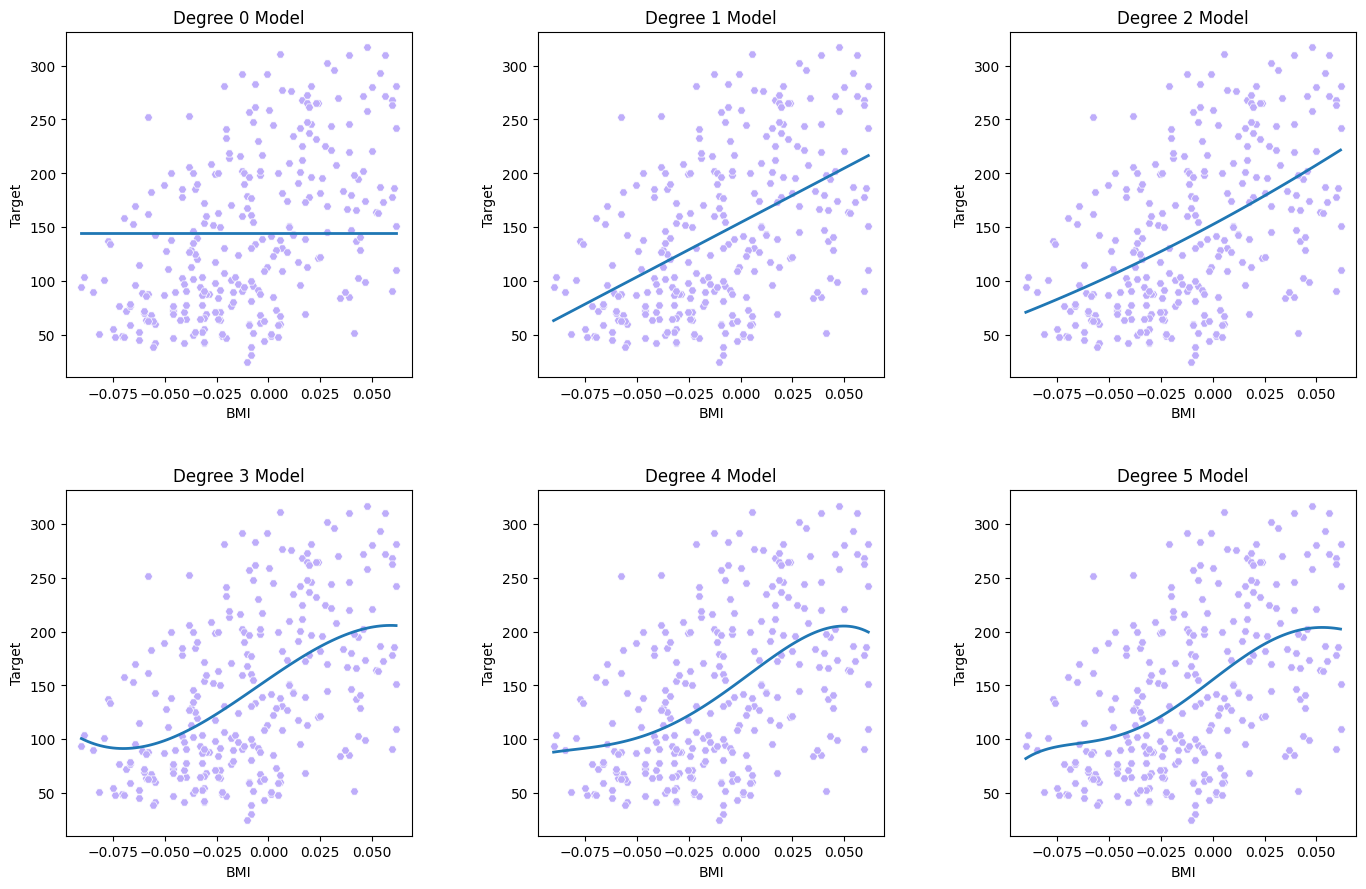

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
fig.tight_layout(pad=6)
tempAx = axes.reshape(1,6)

X_continuous = np.linspace(min(X_train), max(X_train),100) 

for index,( model) in enumerate(models):
    graph = sns.scatterplot(data=df_train[['bmi','target']], x="bmi", y="target", ax=tempAx[0,index], marker='H', color='#BEADFA')
    graph.set_xlabel("BMI")
    graph.set_ylabel("Target")
    graph.set_title(f'Degree {index} Model')
    tempAx[0,index].plot(X_continuous, model.predict(X_continuous), linewidth=2)

## **Training and Validation**

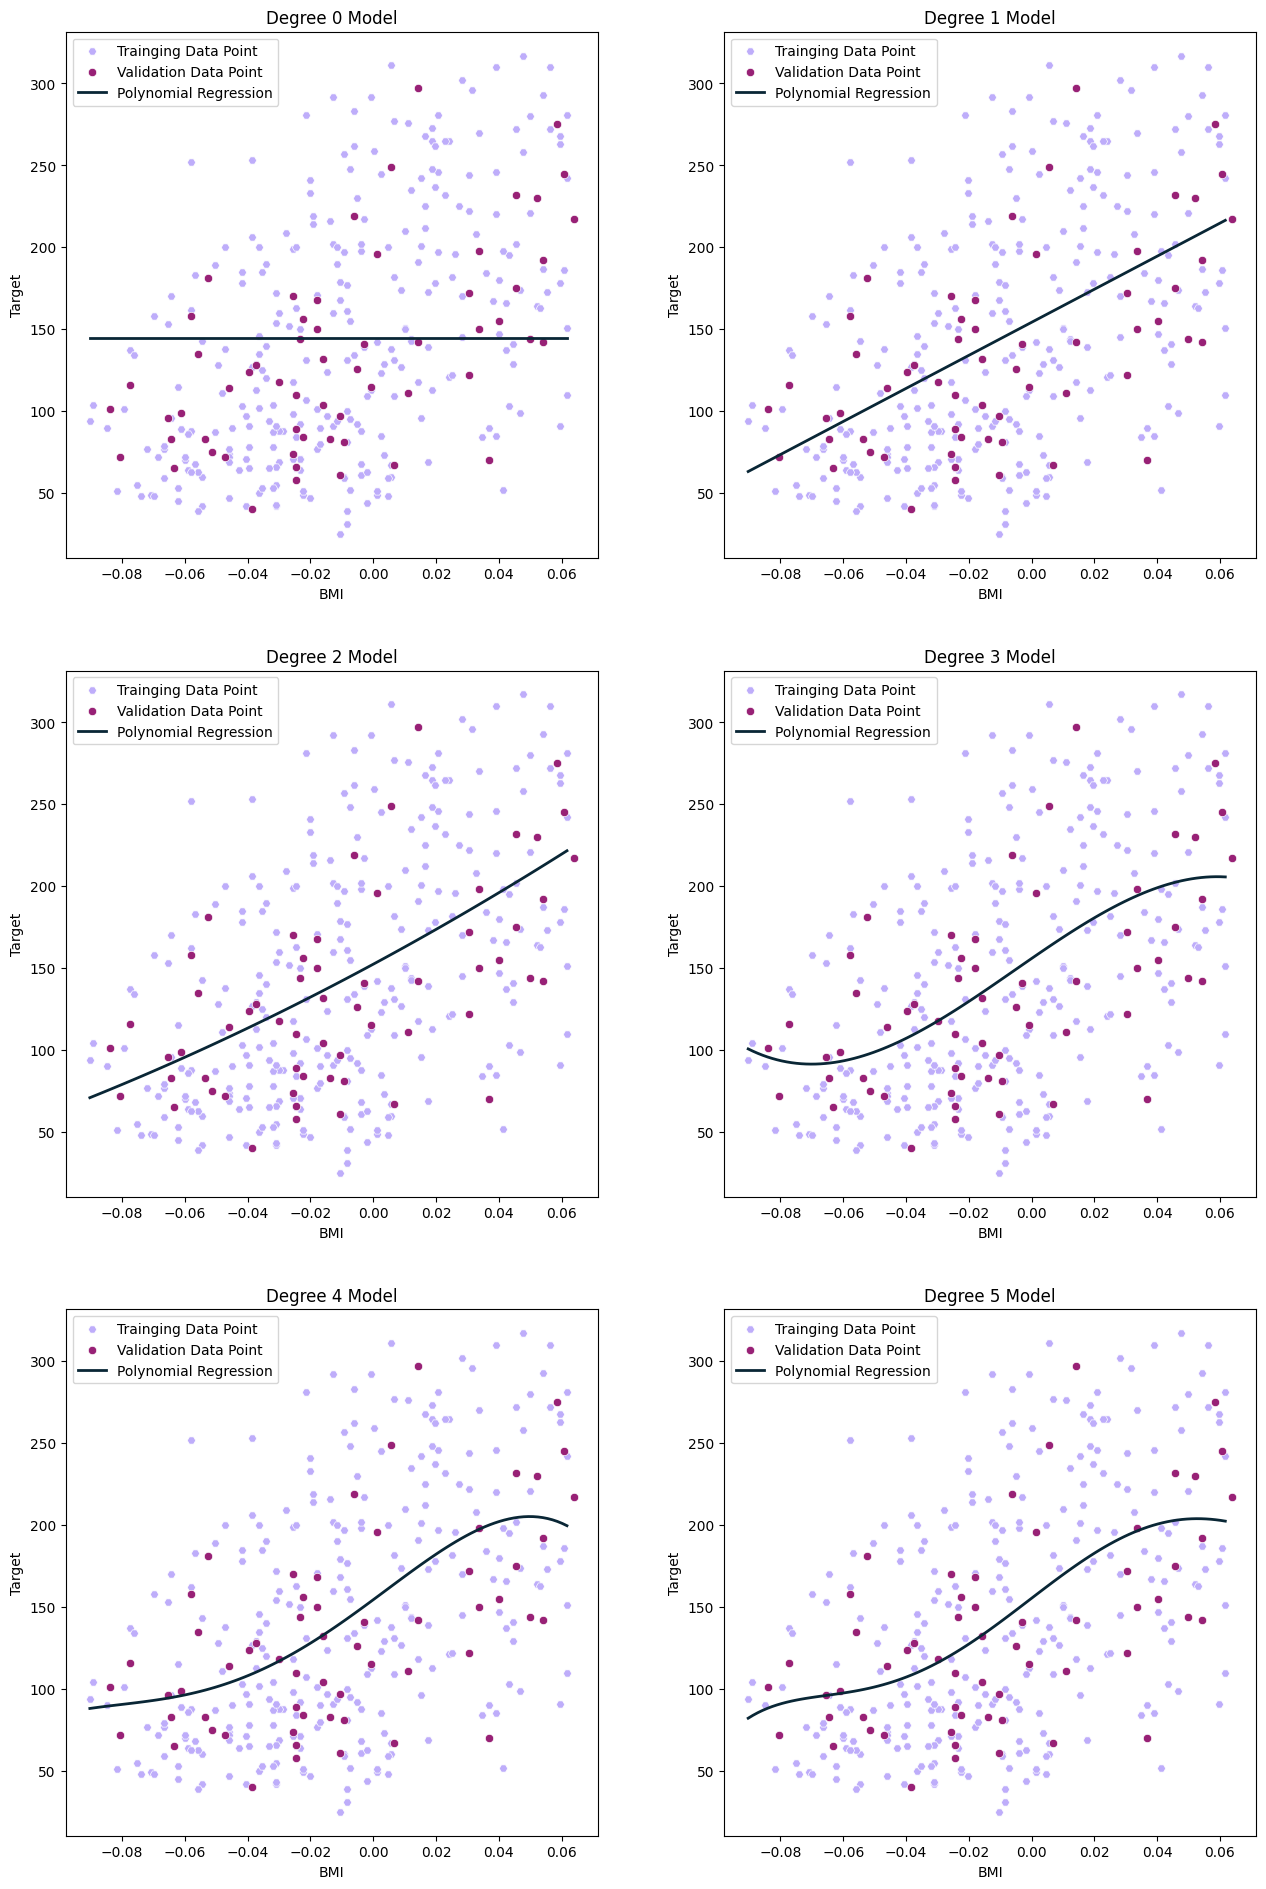

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(14,20))
fig.tight_layout(pad=6)
tempAx = axes.reshape(1,6)

X_train_continuous = np.linspace(min(X_train), max(X_train),100) 

for index,(model) in enumerate(models):
    graph = sns.scatterplot(data=df_train[['bmi','target']], x="bmi", y="target", ax=tempAx[0,index], marker='H', color='#BEADFA', label="Trainging Data Point")
    graph.set_xlabel("BMI")
    graph.set_ylabel("Target")
    graph.set_title(f'Degree {index} Model')
    sns.scatterplot(data=df_validation[['bmi','target']], x="bmi", y="target", ax=tempAx[0,index], marker='o', color='#982176', label="Validation Data Point")
    tempAx[0,index].plot(X_train_continuous, model.predict(X_train_continuous), linewidth=2, color="#092635", label='Polynomial Regression')
    tempAx[0,index].legend()

## **R-squared, MAPE and MAE**

In [17]:
stats = {
    "Degree":[],
    "Train R-Squared":[],
    "Validation R-Squared":[],
    "Train MAPE":[],
    "Validation MAPE":[],
    "Train MAE":[],
    "Validation MAE":[],
}

for index,(model) in enumerate(models):
    stats["Degree"].append(index)
    # Train
    stats["Train R-Squared"].append(r2_score(y_train, model.predict(X_train)))
    stats["Train MAPE"].append(mean_absolute_percentage_error(y_train, model.predict(X_train)))
    stats["Train MAE"].append(mean_squared_error(y_train, model.predict(X_train)))
    
    # Validation
    stats["Validation R-Squared"].append(r2_score(y_validation, model.predict(X_validation)))
    stats["Validation MAPE"].append(mean_absolute_percentage_error(y_validation, model.predict(X_validation)))
    stats["Validation MAE"].append(mean_squared_error(y_validation, model.predict(X_validation)))
    
df_stats = pd.DataFrame(stats)
df_stats.style.highlight_max(color="#65B741", subset=['Train R-Squared','Validation R-Squared','Train MAPE','Validation MAPE','Train MAE','Validation MAE']).highlight_min(color="#FF6868",subset=['Train R-Squared','Validation R-Squared','Train MAPE','Validation MAPE','Train MAE','Validation MAE'])
    

,Degree,Train R-Squared,Validation R-Squared,Train MAPE,Validation MAPE,Train MAE,Validation MAE
0,0,0.000000,-0.029480,0.633432,0.470503,5508.803129,3483.674329
1,1,0.246023,0.291559,0.525075,0.379627,4153.512699,2397.304018
2,2,0.246855,0.300220,0.523390,0.376120,4148.927764,2367.996510
3,3,0.253773,0.293519,0.516585,0.374589,4110.818383,2390.673601
4,4,0.254735,0.286894,0.517067,0.375318,4105.518564,2413.091803
5,5,0.254964,0.295313,0.518085,0.373997,4104.256770,2384.601198


TODO
EDA
SPLITTING DATA
PLOTTING
TRAIN MODEL
PLOT OUTPUT


## **Conclusion**

For selection of the best fit model we look for higher R-squared values, lower MAPE, and lower MAE on the validation dataset, indicating better predictive performance and generalization ability. Among the polynomial models trained from degrees 0 to 5, the best model for generalization and predictive accuracy on validation data is **Degree 2** as it shows the ***highest Validation R-squared (0.300220) and lowest Validation MAE (2367.996510)*** among all degrees considered. 

**1. Running the best model(Degree 2) on test data**

In [18]:
chosen_model = models[2]
r_square = r2_score(chosen_model.predict(X_test),y_test)
mape = mean_absolute_percentage_error(chosen_model.predict(X_test),y_test)
mae = mean_squared_error(chosen_model.predict(X_test),y_test)

df_validation_stats = df_stats[["Validation R-Squared", "Validation MAPE", "Validation MAE"]][df_stats["Degree"]==2]
print(f'Test Data: R-squared: {r_square}, MAPE: {mape}, MAE: {mae}')
df_validation_stats
# mae, mape, r_square

Test Data: R-squared: -1.4115090951769718, MAPE: 0.3605335659214671, MAE: 3785.721070041089


,Validation R-Squared,Validation MAPE,Validation MAE
2,0.30022,0.37612,2367.99651


**2. Graph of best fit model on all dataset**

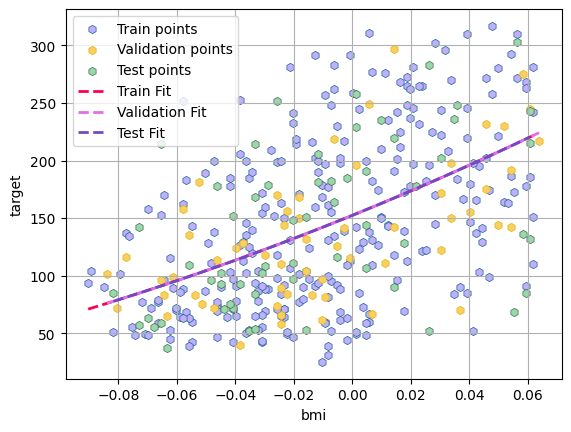

In [19]:
# fig, axes = plt.subplot()
sns.scatterplot(data=df_train[["bmi", "target"]], x="bmi", y="target", marker="h", color="#C1AEFC", edgecolor="#0F6292", label="Train points")
sns.scatterplot(data=df_validation[["bmi", "target"]], x="bmi", y="target", marker="h", color="#F7D060", edgecolor="#E7B10A" , label="Validation points")
sns.scatterplot(data=df_test[["bmi", "target"]], x="bmi", y="target", marker="h", color="#98D8AA", edgecolor="#41644A", label="Test points")

X_train_continuous = np.linspace(min(X_train), max(X_train),100) 
X_validation_continuous = np.linspace(min(X_validation), max(X_validation),100)
X_test_continuous = np.linspace(min(X_test), max(X_test),100)

plt.plot(X_train_continuous,chosen_model.predict(X_train_continuous), linewidth=2,linestyle='--', color="#FF004D", label='Train Fit')
plt.plot(X_validation_continuous,chosen_model.predict(X_validation_continuous), linewidth=2,linestyle='--', color="#E26EE5", label='Validation Fit')
plt.plot(X_test_continuous,chosen_model.predict(X_test_continuous), linewidth=2, linestyle='--',color="#7149C6", label='Test Fit')
plt.legend()
plt.grid(True)
plt.show()

**Equation of the best model with manual calculation**

As chosen model is degree 2, the equation for this model will be 

***y=ax^2 + bx + c***

Where:
y is output,
x is input,
a, b, and c are coefficients

In [20]:
coef = chosen_model[-1].coef_[0][1:]
intercept = chosen_model[-1].intercept_[0]

chosen_input_bmi = 0.02 #as our data is normalized

#as per the equation calculation
y = coef[0]*chosen_input_bmi ** 2 + coef[1]*chosen_input_bmi + intercept
y

print(f'Manually calculated expected diabetes progression is {y}')
print(f'Model calculated expected diabetes progression is {chosen_model.predict([[chosen_input_bmi]])}')


Manually calculated expected diabetes progression is 181.66427555091175
Model calculated expected diabetes progression is [[173.61182298]]


**Trainable Parameters**

In [21]:
for index, model in enumerate(models):
    print(f'Trainable features for model with degree {index} are {model.named_steps["polynomial"].get_feature_names_out()}')

Trainable features for model with degree 0 are ['1']
Trainable features for model with degree 1 are ['1' 'x0']
Trainable features for model with degree 2 are ['1' 'x0' 'x0^2']
Trainable features for model with degree 3 are ['1' 'x0' 'x0^2' 'x0^3']
Trainable features for model with degree 4 are ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']
Trainable features for model with degree 5 are ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5']


Above parameters refer to the value of our equation of polynomial regression.